In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
file_data = pd.read_csv("football_data.csv",encoding='latin1')
file_data.shape

(18207, 89)

# Cleaning the data


In [139]:
# removing rows with wrong placement of data and empty entries
indexes = []
for index,rows in file_data.iterrows():
  if rows['Club Logo'][:5] !='https' or rows['LS'] != rows['LS']:
    indexes.append(index)
print(len(indexes))
file_data = file_data.drop(file_data.index[indexes])
file_data.reset_index(drop=True, inplace=True)
file_data_copy = file_data
file_data.shape

2085


(16122, 89)

In [140]:
#select columns which are useful numerical values
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
useful = ['Age','Overall','Potential','Value','Wage','Special','International Reputation','Skill Moves',
          'Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
          'FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance',
          'ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
          'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling',
          'GKKicking','GKPositioning','GKReflexes']
useful.extend(positions)
print(useful)
file_data = file_data[useful]

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [141]:
import re
def modifyValue(val):
  if val != val:
    return 0
  if type(val) == str:
    val = re.sub('[^A-Z0-9\.]', '', val)
    # val = val[7:]
    last = val[-1]
    if last not in ['K','M']:
      return 0
    val = val[:-1]
    val = float(val)
    val *=1000
    if last == 'M':
      val *= 1000
    return val
  return val 

file_data['Value'] = file_data['Value'].apply(modifyValue)
# print(file_data['Value']) 
file_data['Wage'] = file_data['Wage'].apply(modifyValue)  
# print(file_data['Wage'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [142]:
def modifyHeight(val):
  # print(val)
  val = val.split('\'')
  val = float(val[0])*12 + float(val[1])
  return val

file_data['Height'] = file_data['Height'].apply(modifyHeight)
# print(file_data['Height'])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [143]:
def modifyWeight(weight):
  if type(weight) == str:
    weight = weight.replace('lbs','')
    return float(weight)

file_data['Weight'] = file_data['Weight'].apply(modifyWeight)
print(file_data['Weight'])

0        159.0
1        183.0
2        150.0
3        154.0
4        163.0
         ...  
16117    134.0
16118    170.0
16119    148.0
16120    154.0
16121    176.0
Name: Weight, Length: 16122, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
def position(val):
  # print(val)
  val = val.split('+')
  val = float(val[0]) + float(val[1])
  return val

for pos in positions:
  file_data[pos] = file_data[pos].apply(position)
# print(file_data['LS'])      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# PCA

In [145]:
from sklearn.preprocessing import StandardScaler

X = file_data
X = StandardScaler().fit_transform(X)

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
X_std = StandardScaler().fit_transform(principalDf)

Text(0.5, 1.0, 'Visualization of PCA data')

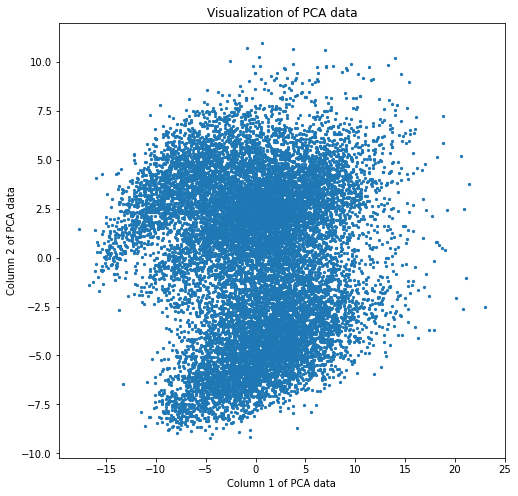

In [147]:
# plotting PCA
plt.figure(figsize=(8, 8))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=5)
plt.xlabel('Column 1 of PCA data')
plt.ylabel('Column 2 of PCA data')
plt.title('Visualization of PCA data')


# DBSCAN

In [192]:
from sklearn.cluster import DBSCAN
import sklearn.utils
db = DBSCAN(eps=0.14,min_samples=5).fit(X_std)
labels = db.labels_
# print(labels)
print(len(set(labels)))
print(set(labels))

8
{0, 1, 2, 3, 4, 5, 6, -1}


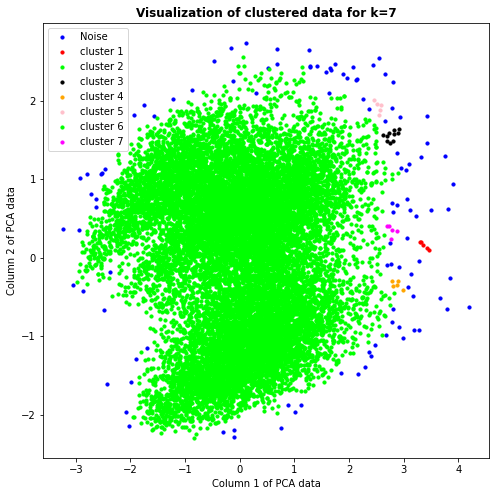

In [195]:
siz=10
plt.figure(figsize=(8, 8))
plt.scatter(X_std[labels == -1, 0], X_std[labels == -1, 1],
            c='blue', label='Noise',s=siz)
plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='red', label='cluster 1',s=siz)
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='lime', label='cluster 2',s=siz)
plt.scatter(X_std[labels == 2, 0], X_std[labels == 2, 1],
            c='black', label='cluster 3',s=siz)
plt.scatter(X_std[labels == 3, 0], X_std[labels == 3, 1],
            c='orange', label='cluster 4',s=siz)
plt.scatter(X_std[labels == 4, 0], X_std[labels == 4, 1],
            c='pink', label='cluster 5',s=siz)
plt.scatter(X_std[labels == 5, 0], X_std[labels == 5, 1],
            c='lime', label='cluster 6',s=siz)
plt.scatter(X_std[labels == 6, 0], X_std[labels == 6, 1],
            c='magenta', label='cluster 7',s=siz)



plt.legend()
plt.xlabel('Column 1 of PCA data')
plt.ylabel('Column 2 of PCA data')
plt.title('Visualization of clustered data for k=7', fontweight='bold')
plt.show()